In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


## Partisan Classification: BERT

In [73]:
BERT_test_results = pd.read_csv('/scratch/amh9750/capstone/capstone_bert_ft/partisan_legal_bert_test_results_32batch_5epoch_2e5lr_1wd.csv')

In [74]:
# test_df = pd.read_csv('/vast/amr10211/sc-test.csv')

In [75]:
# BERT_test_results = BERT_test_results.merge(test_df, how='left', on='id')

In [76]:
BERT_test_results['sigmoid_probability'] = BERT_test_results.apply(
    lambda row: row['probability'] if row['predicted_label'] == 1 else 1 - row['probability'],
    axis=1
)

In [77]:
BERT_test_results.head()

,Unnamed: 0,id,cluster_id,type,date_filed,scdb_decision_direction,labels,predicted_label,probability,sigmoid_probability
0,0,9420371,104708,020lead,1949-06-27,1.0,1,1,0.518619,0.518619
1,1,103349,103349,010combined,1940-04-29,1.0,1,0,0.797333,0.202667
2,2,103362,103362,010combined,1940-05-20,2.0,0,0,0.926838,0.073162
3,3,103369,103369,010combined,1940-05-27,2.0,0,0,0.928312,0.071688
4,4,103418,103418,010combined,1941-02-03,2.0,0,0,0.533091,0.466909


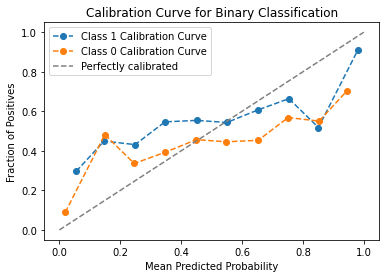

In [78]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Assuming BERT_test_results is a DataFrame or similar structure
predicted_probabilities = BERT_test_results['sigmoid_probability']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']

# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# Calculate reliability values for class 0 (negative class)
prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)

# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, marker='o', linestyle='--', label='Class 1 Calibration Curve')
plt.plot(prob_pred_class0, prob_true_class0, marker='o', linestyle='--', label='Class 0 Calibration Curve')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Binary Classification')
plt.legend()
plt.show()

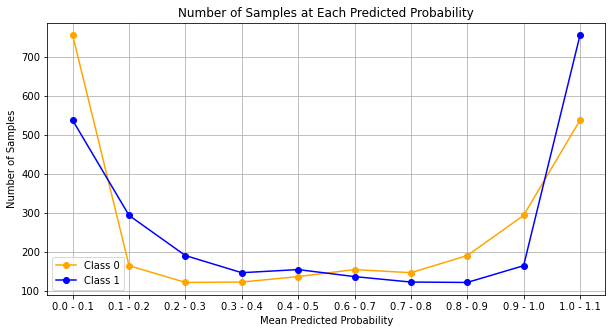

In [79]:
predicted_probabilities = BERT_test_results['sigmoid_probability']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']


# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# Calculate reliability values for class 0 (negative class)
prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)

# Calculate bin counts for both classes
bin_counts_class0, bin_edges_class0 = np.histogram(1 - predicted_probabilities, bins=10)
bin_counts_class1, bin_edges_class1 = np.histogram(predicted_probabilities, bins=10)

# Create line plots for number of samples at each predicted probability bin
fig, ax = plt.subplots(figsize=(10, 5))

# Plot line for class 0
ax.plot(np.linspace(0, 1, 10), bin_counts_class0, marker='o', linestyle='-', label='Class 0', color='orange')

# Plot line for class 1
ax.plot(np.linspace(0, 1, 10), bin_counts_class1, marker='o', linestyle='-', label='Class 1', color='blue')

ax.set_xticks(np.linspace(0, 1, 10))
ax.set_xticklabels([f'{round(x, 1)} - {round(x + 0.1, 1)}' for x in np.linspace(0, 1, 10)])

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Number of Samples')
plt.title('Number of Samples at Each Predicted Probability')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
predicted_probabilities = BERT_test_results['sigmoid_probability']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']

# Calculate the total number of original samples
total_samples = len(predicted_probabilities)

# Calculate accuracy
accuracy = accuracy_score(actual_labels,predicted_labels)

# Identify indices of samples to remove (predictions in the range [0.45, 0.55])
remove_indices = (predicted_probabilities >= 0.45) & (predicted_probabilities <= 0.55)

# Exclude samples in the range [0.4, 0.6] and recalculate accuracy
filtered_predicted_probabilities = predicted_probabilities[~remove_indices]
filtered_predicted_labels = (filtered_predicted_probabilities >= 0.5).astype(int)
filtered_actual_labels = actual_labels[~remove_indices]

selective_accuracy = accuracy_score(filtered_actual_labels, filtered_predicted_labels)

# Count the number of samples removed
num_samples_removed = sum(remove_indices)

print(f"Total Number of Original Samples: {total_samples}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Selective Accuracy (excluding [0.45, 0.55] range): {selective_accuracy:.4f}")
print(f"Number of samples removed: {num_samples_removed}")


Total Number of Original Samples: 2618
Accuracy: 0.6788
Selective Accuracy (excluding [0.45, 0.55] range): 0.6928
Number of samples removed: 154


In [81]:

# Assuming df is your DataFrame containing the results
# You may need to replace 'column_name' with the actual column names from your DataFrame

predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[ 775  299]
 [ 542 1002]]

Precision: 0.7701767870868562
Recall: 0.6489637305699482
F1 Score: 0.7043936731107205


AUC: 0.7678802307966924


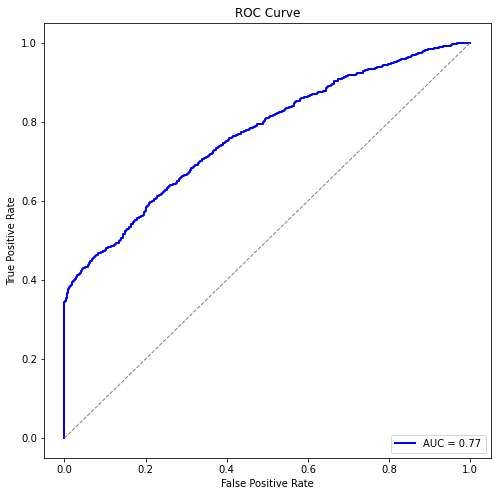

In [82]:
predicted_probabilities = BERT_test_results['sigmoid_probability']
actual_labels = BERT_test_results['labels']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Selective AUC (excluding samples with predicted probabilities between 0.45 and 0.55): 0.778050557558995


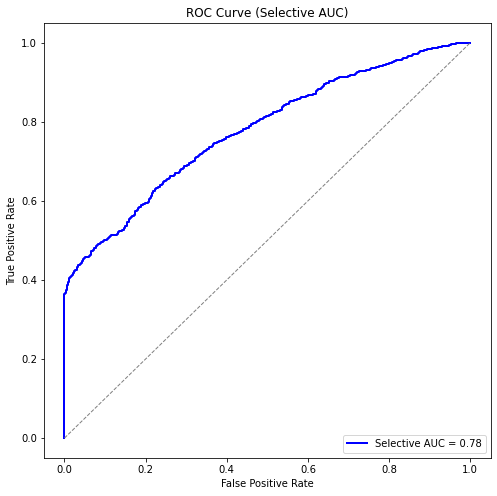

In [83]:
# Filter samples with predicted probabilities outside the range [0.45, 0.55]
mask = (predicted_probabilities < 0.45) | (predicted_probabilities > 0.55)
filtered_predicted_probabilities = predicted_probabilities[mask]
filtered_actual_labels = actual_labels[mask]

# Compute ROC curve and AUC for the filtered data
fpr, tpr, thresholds = roc_curve(filtered_actual_labels, filtered_predicted_probabilities)
auc = roc_auc_score(filtered_actual_labels, filtered_predicted_probabilities)

# Print selective AUC
print("Selective AUC (excluding samples with predicted probabilities between 0.45 and 0.55):", auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Selective AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Selective AUC)')
plt.legend(loc='lower right')
plt.show()


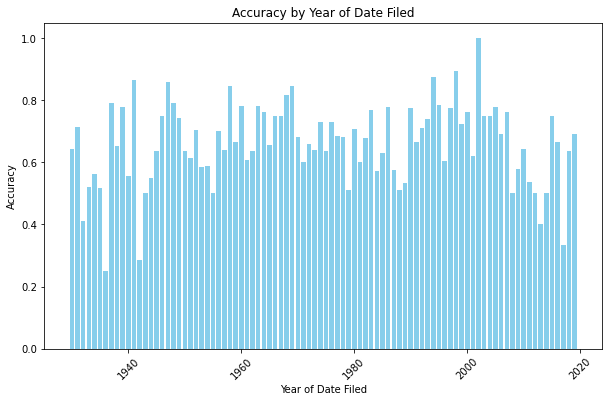

In [86]:
# Convert 'date_filed' to datetime
BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# Extract the year
BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# Initialize lists to store years and accuracies
years = []
accuracies = []

# Iterate through unique years
for year in BERT_test_results['year'].unique():
    # Filter data for the specific year
    year_data = BERT_test_results[BERT_test_results['year'] == year]
    
    # Calculate accuracy for the year
    accuracy = accuracy_score(year_data['labels'], year_data['predicted_label'])
    
    # Append year and accuracy to lists
    years.append(year)
    accuracies.append(accuracy)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(years, accuracies, color='skyblue')
plt.xlabel('Year of Date Filed')
plt.ylabel('Accuracy')
plt.title('Accuracy by Year of Date Filed')
plt.xticks(rotation=45)
plt.show()


/home/amr10211/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/amr10211/.local/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/amr10211/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/amr10211/.local/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


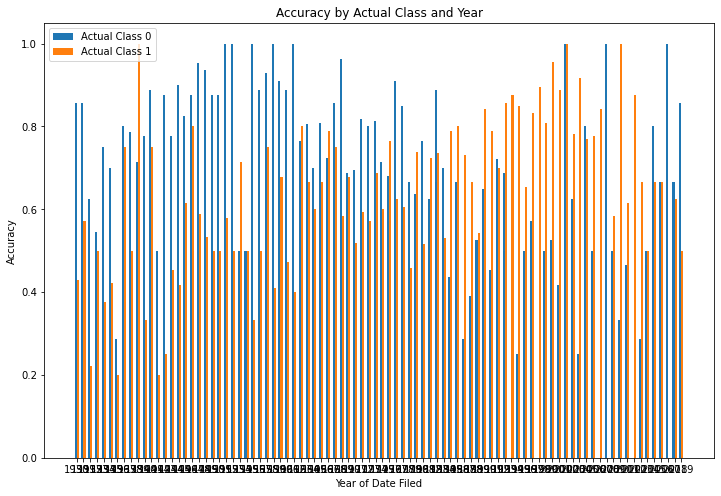

In [90]:
# Convert 'date_filed' to datetime
BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# Extract the year
BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# Initialize lists to store years, actual classes, and accuracies
years = []
actual_classes = []
accuracies_class0 = []
accuracies_class1 = []

# Iterate through unique years and actual classes
for year in BERT_test_results['year'].unique():
    for actual_class in BERT_test_results['labels'].unique():
        # Filter data for the specific year and actual class
        year_class_data = BERT_test_results[(BERT_test_results['year'] == year) & (BERT_test_results['labels'] == actual_class)]
        
        # Calculate accuracy for the year and actual class
        accuracy = accuracy_score(year_class_data['labels'], year_class_data['predicted_label'])
        
        # Append year, actual class, and accuracy to lists
        years.append(year)
        actual_classes.append(actual_class)
        if actual_class == 0:
            accuracies_class0.append(accuracy)
        else:
            accuracies_class1.append(accuracy)

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.3

# Plot bars for each actual class
bar1 = ax.bar([year - bar_width / 2 for year in BERT_test_results['year'].unique()], accuracies_class0, bar_width, label='Actual Class 0')
bar2 = ax.bar([year + bar_width / 2 for year in BERT_test_results['year'].unique()], accuracies_class1, bar_width, label='Actual Class 1')

ax.set_xlabel('Year of Date Filed')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Actual Class and Year')
ax.set_xticks(BERT_test_results['year'].unique())
ax.legend()

plt.show()


/home/amr10211/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/amr10211/.local/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/amr10211/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/amr10211/.local/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


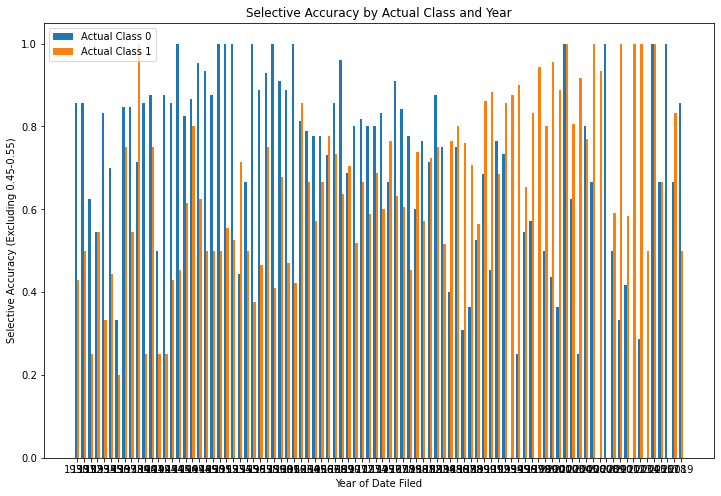

In [92]:
# Convert 'date_filed' to datetime
BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# Extract the year
BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# Initialize lists to store years, actual classes, and selective accuracies
years = []
actual_classes = []
selective_accuracies_class0 = []
selective_accuracies_class1 = []

# Iterate through unique years and actual classes
for year in BERT_test_results['year'].unique():
    for actual_class in BERT_test_results['labels'].unique():
        # Filter data for the specific year and actual class
        year_class_data = BERT_test_results[(BERT_test_results['year'] == year) & (BERT_test_results['labels'] == actual_class)]
        
        # Filter samples with predicted probabilities outside the range [0.45, 0.55]
        mask = (year_class_data['sigmoid_probability'] < 0.45) | (year_class_data['sigmoid_probability'] > 0.55)
        filtered_data = year_class_data[mask]
        
        # Calculate accuracy for the filtered data
        selective_accuracy = accuracy_score(filtered_data['labels'], filtered_data['predicted_label'])
        
        # Append year, actual class, and selective accuracy to lists
        years.append(year)
        actual_classes.append(actual_class)
        if actual_class == 0:
            selective_accuracies_class0.append(selective_accuracy)
        else:
            selective_accuracies_class1.append(selective_accuracy)

# Create a grouped bar plot for selective accuracy
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Plot bars for each actual class
bar1 = ax.bar([year - bar_width / 2 for year in BERT_test_results['year'].unique()], selective_accuracies_class0, bar_width, label='Actual Class 0')
bar2 = ax.bar([year + bar_width / 2 for year in BERT_test_results['year'].unique()], selective_accuracies_class1, bar_width, label='Actual Class 1')

ax.set_xlabel('Year of Date Filed')
ax.set_ylabel('Selective Accuracy (Excluding 0.45-0.55)')
ax.set_title('Selective Accuracy by Actual Class and Year')
ax.set_xticks(BERT_test_results['year'].unique())
ax.legend()

plt.show()


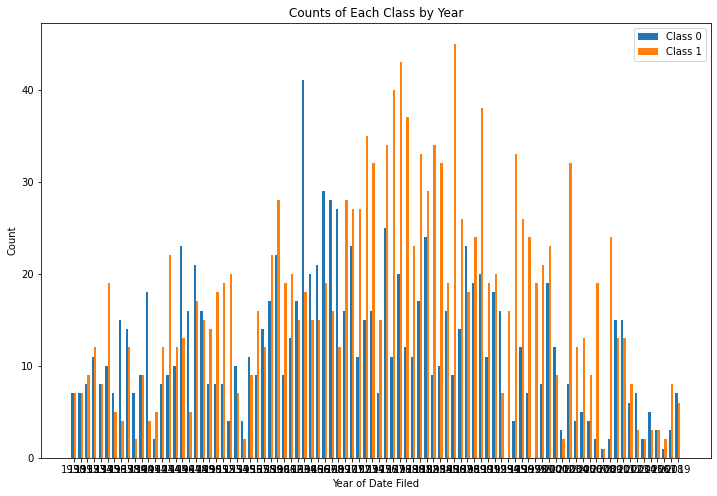

In [93]:
# Convert 'date_filed' to datetime
BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# Extract the year
BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# Initialize lists to store years, class 0 counts, and class 1 counts
years = []
class0_counts = []
class1_counts = []

# Iterate through unique years
for year in BERT_test_results['year'].unique():
    # Filter data for the specific year
    year_data = BERT_test_results[BERT_test_results['year'] == year]
    
    # Count occurrences of each class
    class0_count = (year_data['labels'] == 0).sum()
    class1_count = (year_data['labels'] == 1).sum()
    
    # Append year and counts to lists
    years.append(year)
    class0_counts.append(class0_count)
    class1_counts.append(class1_count)

# Create a grouped bar plot for counts
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Plot bars for each class
bar1 = ax.bar([year - bar_width / 2 for year in BERT_test_results['year'].unique()], class0_counts, bar_width, label='Class 0')
bar2 = ax.bar([year + bar_width / 2 for year in BERT_test_results['year'].unique()], class1_counts, bar_width, label='Class 1')

ax.set_xlabel('Year of Date Filed')
ax.set_ylabel('Count')
ax.set_title('Counts of Each Class by Year')
ax.set_xticks(BERT_test_results['year'].unique())
ax.legend()

plt.show()
